# Opencv Tutorial

It is one of the most importatnt packages in computer vision

In [1]:
#pip install moviepy

In [2]:
import cv2 as cv

## What opencv can do for you

### 1- Reading Images
cv.imread() Api, you can read the pixels of image

In [3]:
cat_image = cv.imread('cat1.jfif')

### 2- Showing Images
To show images in windows use cv2.imshow('window_name',image).

Note: cv2.imshow() should be followd with cv2.waitKey()

In [4]:
cv.imshow('cat', cat_image)
cv.waitKey()
 

-1

### 3- Reading Videos and writing frames
VideoCapture() is used to read the videos. 

There are two possibilities to read this video:

1- It can be read from camera or from the the disk. So, if it is from camera, then use numbers like 0, 1,2

2- If it is read from the disk, then use the video path

In [5]:
# Reda the video, here if we read from computer camera we can put its number instead of the video path
captured_video = cv.VideoCapture('Facebook.mp4')

In [6]:
def obtain_frames(captured_video):
    
    is_True, frame = captured_video.read()
    while is_True:

        cv.imshow('image', frame)
        
        #don't wait 20 ms if d is pressed
        if cv.waitKey(20) & 0xFF==ord('d'):
            break
        
        # Read frame by frame from the read video
        is_True, frame = captured_video.read()
        # This count is used to  
        
    #Release the captured device        
    captured_video.release()
    # Destroy all the windows
    cv.destroyAllWindows()

In [7]:
obtain_frames(captured_video)

Note: The above code output an error after finishing the images, so we should put the 1st frame read outside the while loop

### 4- Extracting frames from videos:

In [8]:
# Reda the video, here if we read from computer camera we can put its number instead of the video path
captured_video = cv.VideoCapture('Facebook.mp4')

In [9]:
import time

def obtain_frames(captured_video):
    count = 0
    is_True, frame = captured_video.read()
    while is_True:

        cv.imwrite("images//frame%d.jpg" % count, frame)
        
        #don't wait 20 ms if d is pressed
        if 0xFF==ord('d'):
            break
        #skip the 10 frames, then take the 11th one
        for i in range(1,11,1):
            # Read frame by frame from the read video
            is_True, frame = captured_video.read()
            # This count is used to  
        count = count + 1
    #Release the captured device        
    captured_video.release()
    # Destroy all the windows
    cv.destroyAllWindows()



In [10]:
obtain_frames(captured_video)

### 5- Rescaling the images

cv2.resize(frame, new_dimension, interpolation) is used to rescale the image dimension to a new dimenstion. This method can be used for resizing the images, videos on the disk, or live video



Rescaling the image led to losing some information inside the image.

Interpolation has different options (from this: https://chadrick-kwag.net/cv2-resize-interpolation-methods/):

INTER_NEAREST – a nearest-neighbor interpolation
INTER_LINEAR – a bilinear interpolation (used by default)
INTER_AREA – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to theINTER_NEAREST method.
INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood
INTER_LANCZOS4 – a Lanczos interpolation over 8×8 pixel neighborhood



In [11]:
# Reda the video, here if we read from computer camera we can put its number instead of the video path
captured_video = cv.VideoCapture('Facebook.mp4')

In [12]:
def rescale_frame(frame, perentage=0.7):
    width = int(frame.shape[1] * perentage)
    hight = int(frame.shape[0] * perentage)
    
    dimension = (width, hight)
    new_frame = cv.resize(frame, dimension, interpolation=cv.INTER_AREA)
    
    return new_frame

In [13]:
def obtain_frames(captured_video):
    
    is_True, frame = captured_video.read()
    
    while is_True:
        # To rescale the image
        new_frame = rescale_frame(frame)
        
        # Display the new frame
        cv.imshow('image after rescaling', new_frame)
        cv.imshow('image ', frame)

        #don't wait 20 ms if d is pressed
        if cv.waitKey(20) & 0xFF==ord('d'):
            break

        
        # Read frame by frame from the read video
        is_True, frame = captured_video.read()
        
        
    #Release the captured device        
    captured_video.release()
    # Destroy all the windows
    cv.destroyAllWindows()

In [14]:
obtain_frames(captured_video)

### 6- Drawing on images:
we can draw on images such as:

- Changing the the color. This color change can happen completely or partialy:
  
  - completely like cat_image[:] = 0, 255, 0

  - partialy like cat_image[100:150,:] = 0, 255, 0


In [15]:
cat_image = cv.imread('cat1.jfif')
cat_partial_color = cat_image
cat_partial_color[100:150,:] = 0, 255, 0
cv.imshow('cat', cat_partial_color)
cv.waitKey()


-1

- Drawing a rectangle. This can be done using cv2.rectangle() which takes:

  - The image which should be changed.
  
  - point1 which is the start of the rectangle
  
  - point2 which is the end of the rectangle
  
 Notes:

     - You can used  thickness=cv.FILLED if you would like to fill it.
     - You can use the image shape[0], shape[1] as points.
     - You can draw circle using cv.circle(), or line using cv.line()
     - 
 
 

In [16]:
cat = cv.imread('cat1.jfif')
rec = cv.rectangle(cat, (0,0), (150,120), (0,255,0), thickness=2)

In [17]:
cv.imshow('cat', rec)
cv.waitKey()

-1

### 7- Writing a text:

This is done using cv2.putText(image,Text ,org=(startPoint, EndPoint), font, fontScale, color, thickness )

In [18]:
cat = cv.imread('cat1.jfif')
image_text = cv.putText(cat, 'I am a cat', (5,20), cv.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2 )
cv.imshow('writing on the cat', image_text)
cv.waitKey()

-1

### 8- Converting colored images into gray

Many of images arround us are colored. This colored images are called BGR images. To convert these images into gray then use:

   cv2.cvtColor(image, cv2.COLOR_BGR2GREY)

In [19]:
cat = cv.imread('cat1.jfif')
grey = cv.cvtColor(cat, cv.COLOR_BGR2GRAY)
cv.imshow('Gray cat', grey)
cv.waitKey()

-1

### 9- Bluring

Bluring means removing the noise from image. This noise can come from bad lightness, or sensitivity of Camera.
There are many Bluring Techniques.


- Averaging which means the anchor point of the kernal has an averge value of this kernel during sliding this kernel slides on image.

The more kernel size the more bluring to the image.


In [20]:
image = cv.imread('tain.JPG')
cv.imshow('Before Bluring', image)
averaged = cv.blur(image,[7,7])
cv.imshow('Averaged', averaged)
cv.waitKey()

-1

- Gaussian Bluring(image, kernel_size, segma_X)
In this bluring way there are weights for each place in the kernel. Then it multiples each pixel with its weight in the kernel, and the average of all weights gives you a value for the center.
  
kernel_sizeis used to define how much of the image should be blured.

Note: this is better than average.

In [21]:
Blurrred_image = cv.GaussianBlur(image, (7,7), 20)
cv.imshow('Gaussian', Blurrred_image)
cv.waitKey()

-1

- Median: it is the same like avergae but instead of calculating the avergae, here calculate the median. The kernel size is preferred to be 3 or 5 maximum

In [22]:
Blurrred_image = cv.medianBlur(image, 7)
cv.imshow('Median', Blurrred_image)
cv.waitKey()

-1

Note: it is better than the original image.

- A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images.

It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. 

This weight can be based on a Gaussian distribution. Thus, sharp edges are preserved while discarding the weak ones.

This function takes the following:

d - Diameter of the pixel neighborhood to consider while blurring. Since, this filter is slower than other filters, it is recommended to keep d = 5 for real-time applications.

sigma_colour - This is the value of sigma in the colour space (RGB, HSV, and so on). Higher the value of this parameter, colours farther apart in the colour space are considered for the filtering provided they lie within the range of sigma_space.  


sigma_space - This is the value of sigma in the co-ordinate space. Higher this value, pixels farther apart in the co-ordinate space are considered for the filtering provided their colours are within the sigma_colour range.


In [23]:
import cv2 as cv
import numpy as np
image = cv.imread('tain.jpg')

bilateral = cv.bilateralFilter(image, 10, 125, 100)

cv.imshow('image', image)
cv.imshow('Bilateral', bilateral)

cv.waitKey(0)
cv.destroyAllWindows()

### 10-Gradient and edge detection 

There are many ways for edge detection such as sobel, canny, Laplacing

- Canny Edge detection is an Algorithm consisting of 4 major steps:
  - Reduce Noise using Gaussian Smoothing.
  - Compute image gradient using Sobel filter.
  - Apply Non-Max Suppression or NMS to just jeep the local maxima
  - Finally, apply Hysteresis thresholding which that 2 threshold values T_upper and T_lower which is used in the Canny()  function.


In [24]:
image = cv.imread('tain.jpg')
#cv.imshow('Image', image)

grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
#cv.imshow('Grey Image', grey)

Blurrred_image = cv.GaussianBlur(grey, (7,7), 25)
cv.imshow('Blurred Image', Blurrred_image)

edges = cv.Canny(Blurrred_image, 50, 150)
cv.imshow('Edges', edges)
cv.waitKey()

-1

Note:
Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded. See the image below

https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

So, in our above example, we have three probabilities:
- The edges with gradient more than 150 is sure to be edge, 
- If the gradient is less than 50, then it is sure to be not edge.
- If the grdient is between 50 and 150 may be considered an edge or now according to its connectivity.

Note:
There many ways for edge detection like sobel :
https://learnopencv.com/edge-detection-using-opencv/


- Laplacing:
Laplacian edge detector compares the second derivatives of an image. It measures the rate at which first derivative changes in a single pass. Laplacian edge detection uses one kernel and contains negative values.

One shortcoming of Laplacian edge detector is that it’s sensitive to noise. That is, it might end detecting noises as edges. It’s a common practice to smoothen the image before applying the Laplacian filter.

cv2.Laplacian() takes the following parameters:

   - dst	Destination image of the same size and the same number of channels as src .
   - ddepth	Desired depth of the destination image.
   - ksize	Aperture size used to compute the second-derivative filters. See getDerivKernels for details. The size must be positive and odd.
   - scale	Optional scale factor for the computed Laplacian values. By default, no scaling is applied. See getDerivKernels for details.
   - delta	Optional delta value that is added to the results prior to storing them in dst .
   - borderType	Pixel extrapolation method, see BorderTypes. BORDER_WRAP is not supported.

In [2]:
import cv2 as cv
import numpy as np
image = cv.imread('cat2.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
lab = cv.Laplacian(gray, cv.CV_16S, 3)
# We did this step because Laplacian do some gradient moving from positive to negative and from negative to positive.But the image can't have a negative value
lab_image = cv.convertScaleAbs(lab)

In [3]:
cv.imshow('Laplacian Edge Detection', lab_image)
cv.imshow('Gray', gray)
cv.waitKey(0)

-1

- Sobel
It computes the gradients in two directions x and y.
cv.sobel()takes the following parameters:

  - src	input image.
  - dst	output image of the same size and the same number of channels as src .
  - ddepth	output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives.
  - dx	order of the derivative x.
  - dy	order of the derivative y.
  - ksize	size of the extended Sobel kernel; it must be 1, 3, 5, or 7.
  - scale	optional scale factor for the computed derivative values; by default, no scaling is applied (see getDerivKernels for details).
  - delta	optional delta value that is added to the results prior to storing them in dst.
  - borderType	pixel extrapolation method, see BorderTypes. BORDER_WRAP is not supported.

In [4]:
import cv2 as cv
import numpy as np
image = cv.imread('cat2.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)

In [5]:
Combined = cv.bitwise_or(sobelx, sobely)

In [6]:
cv.imshow('sobelx', sobelx)
cv.imshow('sobely', sobely)
cv.imshow('Combined', Combined)

cv.waitKey(0)

-1

### 11- Dilation

- It adds pixels to the boundaries of the image or grow thicknessin a binary image. 

- The process of performing convolution with kernel having anchor point of a particular shape in a given input image is  called dilate() function in OpenCV.

- The dilate() function starts with computing the minimum pixel value by overlapping the kernel over the input image.

- And then the image is replaced by the kernel anchor at the center.

- This causes the white regions in the image to grow bigger in size and the image size increases as well.

- The dilate() function returns an image with increased size of white shade in the given image.

Please have a look on this website for more details: https://www.educba.com/opencv-dilate/

Note: The input image to the kernel (Structure element) is the binary image after edge detection step.
To be able to imagine it more, please have a look on the following:
https://www.youtube.com/watch?v=7-FZBgrW4RE


In [30]:
import cv2 as cv
import numpy as np
image = cv.imread('cat2.jpg')
cv.imshow('Image', image)

grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

edges = cv.Canny(grey, 50, 150)

kernelmatrix = np.ones((3, 3), np.uint8)

dilated_image = cv.dilate(edges, kernelmatrix, iterations = 1)

cv.imshow('Dilated Image 3x3 ones', dilated_image)

dilated_image = cv.dilate(edges, (2,2), iterations = 2)

cv.imshow('Dilated Image 2x2', dilated_image)
cv.waitKey()
cv.waitKey()



-1

### 12- Erosion

- It reduces the number of pixels from image boudaries in the bianry image.
- The number of pixels removed depends on the size of structuring elements
- The output performed by OpenCV erode() is quite similar to OpenCV dilate function. 
- The major change that can be noted is that the calculated pixel value is the minimum value in contrast to the maximum value, which is calculated when using the OpenCV dilate function.
- The processed image is substituted underneath the anchor terminal with respect to the calculated value for the minimum pixel outstanding range. 
- Also, the resultant image after the processing can be seen to have comparatively darker regions 

In [31]:
import cv2 as cv
import numpy as np
image = cv.imread('cat2.jpg')
cv.imshow('Image', image)

grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

edges = cv.Canny(grey, 50, 150)

kernelmatrix = np.ones((3, 3), np.uint8)

dilated_image = cv.dilate(edges, kernelmatrix, iterations = 1)

cv.imshow('Dilated Image 3x3 ones', dilated_image)

kernelmatrix = np.ones((2, 2), np.uint8)
eroded_image = cv.erode(dilated_image, kernelmatrix, iterations = 2)

cv.imshow('Erudded Image 2x2 ones', eroded_image)


cv.waitKey()
cv.waitKey()



-1

### Cropping an Image

In [32]:
import cv2 as cv
import numpy as np
before_cropping_image = cv.imread('cat1.jfif')

In [33]:
cv.imshow('Before Cropping', before_cropping_image)
cv.waitKey()

-1

In [34]:
after_cropping_image = before_cropping_image[30:100,1:100]

In [35]:
cv.imshow('After Cropping', after_cropping_image)
cv.waitKey()

-1

### Image Transformation
Image transformation: includes scaling or resizing, Translation, edge detection, croping, There are two rpes of transformations such as Affin, or nonAffin. In Affin transformation all parallel lines in the original images will be parallel in the output image.

#### Affin
- Scaling or resizing like the previous one.

- Translation: It is aAffine transformation. It is the process of moving the image in the up, down, left, right directions.

  - It is basically shifting the image in x and y axis. You can shift the image up, down, left, right.
  
  - In Affine transformation, all parallel lines in the original image will still be parallel in the output image. 
  
  - To translate an image, we need a translation matrix, dimensions, image.
  - Translation Matrix: the [[1, 0, x], [0, 1, y]], the x is the shift in x (horizontal direction), and the y is the shift in y (vertical direction.)
    - If x is negative, then you are translating the image into the left
    - If x is positive, then you are translating the image into the right.
    - If y is negative, then you are shifting image up
    - If y is positive, then you are shifting image down.


In [36]:
def translate(image, x, y):
    translate_mt = np.float32([[1,0,x], [0,1,y]])
    dimensions = (image.shape[1], image.shape[0])
    return cv.warpAffine(image, translate_mt, dimensions)

In [37]:
image = cv.imread('tain.jpg')
translated_image = translate(image, -100,10)

In [38]:
translated_image.shape

(720, 960, 3)

In [39]:
image.shape

(720, 960, 3)

In [40]:
cv.imshow('Before Translation', image)
cv.imshow('After Translation', translated_image)
cv.waitKey()

-1

- Rotation:It is the process of rotating the image clockwise or anticlockwise, we can rotate the image using the center and using the angel. To rotate the image we use the rotation matrix.


In [41]:
# angel which we will rotate with.
# rotate_point: where we rotate.
def rotate(image, angle, rotate_point=None):
    (height, width) = (image.shape[1], image.shape[0])
    
    if rotate_point is None:
        rotate_point = (int (width/2), int (height/2))
    #center: Center of rotation
    #angle(θ): Angle of Rotation. Angle is positive for anti-clockwise and negative for clockwise.
    #scale: scaling factor which scales the image 
    rotate_matrix = cv.getRotationMatrix2D(center=rotate_point, angle=angle, scale=1)
    
    dimensions = (width, height)
    
    return cv.warpAffine(image, rotate_matrix, dimensions)
    

In [42]:
image = cv.imread('tain.jpg')
rotated_image = rotate(image, 45)


In [43]:
cv.imshow('After Rotation', rotated_image)
cv.waitKey()

-1

- Flipping: it is the process of flipping the image herozontally or vertically.

In [44]:
image = cv.imread('cat2.jpg')
cv.imshow('Before Flipping', image)
flipped_image = cv.flip(image, 0)
cv.imshow('After Flipping', flipped_image)
cv.waitKey()

-1

#### Non Affin: 
The Non Affin operations: is the process of refining the skewed images image  to a more refined image.

In [45]:
import cv2 as cv
import numpy as np
image = cv.imread('palner.jfif')
width, height = 700,800
new_origin = np.float32([[50,50],[width,50],[50,height],[width, height]])
org_origin = np.float32([[487,108],[998, 358],[40,560],[537,930]])

In [46]:
resulted_image = cv.getPerspectiveTransform(org_origin, new_origin)

In [47]:
finalimage = cv.warpPerspective(image, resulted_image, (width, height))
cv.imshow('image', image)

cv.imshow('Destination_image', finalimage)
cv.waitKey(0)

-1

Note, it is took as a plan object

### Contour detection:
Contours are basically the boundaries of objects, lines or curves that join the continous points along the boundary, 
From Mathmatics, they are diffrent from edges. Contours are usefull incase of object detection, shape analysis.

#### What is difference between contours and edge detection?

Edges are computed as points that are extrema of the image gradient in the direction of the gradient. if it helps, you can think of them as the min and max points in a 1D function. The point is, edge pixels are a local notion: they just point out a significant difference between neighbouring pixels.

Contours are often obtained from edges, but they are aimed at being object contours. Thus, they need to be closed curves. You can think of them as boundaries (some Image Processing algorithms & librarires call them like that). When they are obtained from edges, you need to connect the edges in order to obtain a closed contour.


The main difference between finding edges and countours is that if you run finding edges the output is new image. In this new (edge image) image you will have highlighted edges. There are many algorithms for detecting edges look at wiki see also.

On the other hand Contours algorithm processes arbitrary binary image. So if you put in white filled square on black background. After running Contours algorithm, you would get white empty square, just the borders.

Other added bonus of contour detection is, it actually returns set of points! That's great, because you can use these points further on for some processing.


Contours can actually do a bit more than "just" detect edges. The algorithm does indeed find edges of images, but also puts them in a hierarchy. This means that you can request outer borders of objects detected in your images. Such a thing would not be (directly) possible if you only check for edges.

As can be read in the documentation, detecting contours is mostly used for object recognition, whereas the canny edge detector is a more "global" operation. I wouldn't be surprised if the contour algorithm uses some sort of canny edge detection.

look at : https://newbedev.com/difference-between-edge-detection-and-image-contours

#### Finding Contours:
- Convert the image to gray
- Bluring the image, this will help to find the main contours inside the image.
- Find the edges usinf cv.canny(), cv.sobel(), cv.threshold() which is used to binarize the image.
- Find contours using cv2.findContours(image_output_from_edge_detection, Contour_retrieval_mode, Contour_Approximation_Method) which returns contours and hirarchies.

contours: Detected contours. Each contour is stored as a vector of point.

hierarchy: Optional output vector containing information about the image topology. It has as many elements as the number of contours. 

For each i-th contour contours[i], the elements hierarchy[i][0] , hierarchy[i][1] , hierarchy[i][2] , and hierarchy[i][3] are set to 0-based indices in contours of the next and previous contours at the same hierarchical level, the first child contour and the parent contour, respectively. If for the contour i there are no next, previous, parent, or nested contours, the corresponding elements of hierarchy[i] will be negative.

#### The Contour Retrieval Mode has the following modes:
RETR_EXTERNAL 
Python: cv.RETR_EXTERNAL
retrieves only the extreme outer contours. It sets hierarchy[i][2]=hierarchy[i][3]=-1 for all the contours.

RETR_LIST 
Python: cv.RETR_LIST
retrieves all of the contours without establishing any hierarchical relationships.

RETR_CCOMP 
Python: cv.RETR_CCOMP
retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes. If there is another contour inside a hole of a connected component, it is still put at the top level.

RETR_TREE 
Python: cv.RETR_TREE
retrieves all of the contours and reconstructs a full hierarchy of nested contours.

RETR_FLOODFILL 
Python: cv.RETR_FLOODFILL
#### Contour Approximation Method

This is the third argument in cv.findContours function. What does it denote actually?

Above, we told that contours are the boundaries of a shape with same intensity. It stores the (x,y) coordinates of the boundary of a shape. But does it store all the coordinates ? That is specified by this contour approximation method.

If you pass cv.CHAIN_APPROX_NONE, all the boundary points are stored. But actually do we need all the points? For eg, you found the contour of a straight line. Do you need all the points on the line to represent that line? No, we need just two end points of that line. This is what cv.CHAIN_APPROX_SIMPLE does. It removes all redundant points and compresses the contour, thereby saving memory.

Below image of a rectangle demonstrate this technique. Just draw a circle on all the coordinates in the contour array (drawn in blue color). First image shows points I got with cv.CHAIN_APPROX_NONE (734 points) and second image shows the one with cv.CHAIN_APPROX_SIMPLE (only 4 points). See, how much memory it saves!!!

#### Contour approximation method options are as follwos:
CHAIN_APPROX_NONE 
Python: cv.CHAIN_APPROX_NONE
stores absolutely all the contour points. That is, any 2 subsequent points (x1,y1) and (x2,y2) of the contour will be either horizontal, vertical or diagonal neighbors, that is, max(abs(x1-x2),abs(y2-y1))==1.

CHAIN_APPROX_SIMPLE 
Python: cv.CHAIN_APPROX_SIMPLE
compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, an up-right rectangular contour is encoded with 4 points.

CHAIN_APPROX_TC89_L1 
Python: cv.CHAIN_APPROX_TC89_L1
applies one of the flavors of the Teh-Chin chain approximation algorithm

CHAIN_APPROX_TC89_KCOS 
Python: cv.CHAIN_APPROX_TC89_KCOS
applies one of the flavors of the Teh-Chin chain approximation algorithm

In [48]:
import cv2 as cv
import numpy as np
image = cv.imread('cat2.jpg')

# - convert into grey image
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
blured = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
edges = cv.Canny(blured, 125, 175)

contours, hierarchies = cv.findContours(edges, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
#To find the number of contours extracted
print(len(contours))
cv.imshow('After edged detection', edges)
cv.waitKey(0)

165


-1

Drawing the contours using the 

void cv::drawContours	(image, contours, contourIdx, const Scalar & 	color, int 	thickness = 1, int 	lineType = LINE_8,
InputArray 	hierarchy = noArray(), int 	maxLevel = INT_MAX, Point 	offset = Point() )		

if contourIdx = -1 means all contours


In [49]:
#To draw the contours, we should draw the contours.
blank = np.zeros(image.shape, dtype='uint8')
cv.drawContours(image=blank, contours=contours, contourIdx = -1, color = (0,0,255), thickness = 1)
cv.imshow('The blank Image', blank)
cv.waitKey(0)

-1

### Color Spaces:
We have many color spaces inside OpenCv like RGB, Grayscale, HSV, LAB. We will know how to switch between color spaces. The default color spaces in OpenCv is BGR.

In [50]:
image = cv.imread('cat2.jpg')

# convert into grey image
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv.imshow('Gray Image', gray)
cv.waitKey(0)

-1

In [51]:
# convert into hsv image
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
cv.imshow('HSV Image', hsv)
cv.waitKey(0)

-1

In [52]:
# convert into LAB image
lab = cv.cvtColor(image, cv.COLOR_BGR2LAB)
cv.imshow('LAB Image', lab)
cv.waitKey(0)


-1

If we would like to use another system like matplotlib to show the image which has been read by OpenCV, then you should convert it from BGR into RGB. Lets see an example:

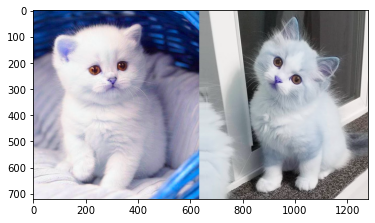

In [53]:
import matplotlib.pyplot as plt
plt.imshow(image)

We notice that the image has been changed. So lets convert it into RGB before showing it.

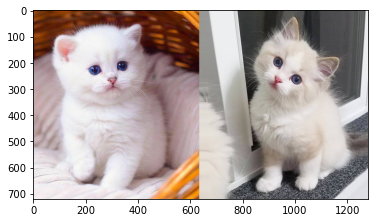

In [54]:
RGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(RGB)

Also, we can convert the image from gray to BGR. But we can't convert the image directly from Gray to HSV directly.

To convert the Gray to HSV

### Color Channel:
Here, I will show how to merge and split a color channel. Colored image consists of many color channels such as red, blue, green. Any image arround us is three color channel merged together, now OpenCV allowed us to split the colors to Red, Green, Blue.

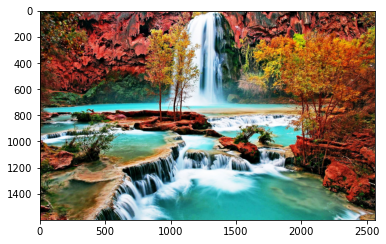

In [55]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('nature.jfif')
b,g,r = cv.split(image)

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))


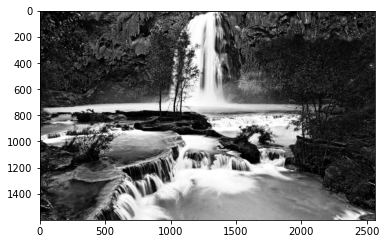

In [56]:
plt.imshow(b, cmap="gray")


We notice that the above image shows the blue channel only as grayscale. Since the blue color is in the part of water so, the water is the lighter part.If we notice trees are very dark since they don't have any blue color in it in the original image.

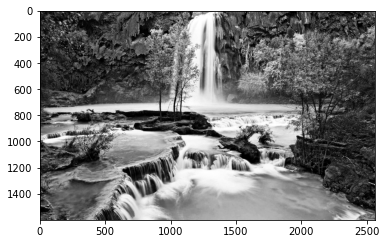

In [57]:
plt.imshow(g, cmap="gray")


We notice that the above image shows the blue channel only as grayscale. Since the green color is in the part of water and treesso, the water and part of trees are lighter part.
But other parts are dark.

(1600, 2560, 3)
(1600, 2560)
(1600, 2560)
(1600, 2560)


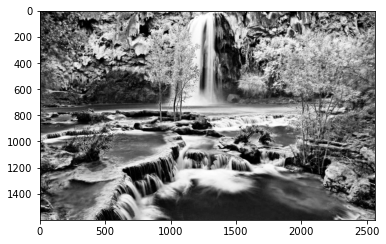

In [58]:
plt.imshow(r, cmap="gray")


print(image.shape)
print(b.shape)
print(g.shape)
print(r.shape)

Note that the diplayed images as grayscale images. The lighter area means there are many pixels in this region from the red channel.

Note that the image shape is 1600, 2560, 3, because it has 3 channels. But the red, blue, green images don't have 3. Beacuse there is no 3 in the shape of the channels, so ti is shown as grayscale. Since gray scale images are two dimentions.

Lets merge the three images and see what will happen

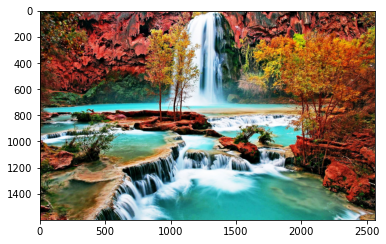

In [59]:
merged = cv.merge([r,g,b])
plt.imshow(merged)

### Bitwise Operator

There are four operators xor, or, and, not It is is used in masking the images in the high level of image processing.

In [60]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
blank = np.zeros((400,400), dtype='uint8')
rectangle = cv.rectangle(blank.copy(), (60,60), (380,380), 255, -1 )
circle = cv.circle(blank.copy(), (220,220), 180, 255, -1 )

cv.imshow('rectangle', rectangle)
cv.imshow('circle', circle)
cv.waitKey(0)

-1

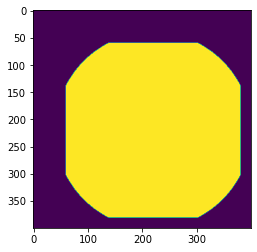

In [61]:
bitwise_and = cv.bitwise_and(rectangle, circle)
#cv.imshow('bitwise_and', bitwise_and)
#cv.waitKey(0)
plt.imshow(bitwise_and)

Note: that the resulted shape is considered as a combination of intersection of both square and circle

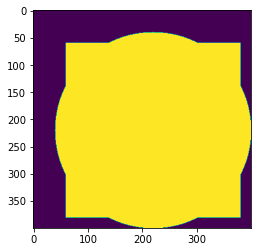

In [62]:
bitwise_or = cv.bitwise_or(rectangle, circle)
plt.imshow(bitwise_or)

Note: the resulted shape is a combination of intersection and the not intersection

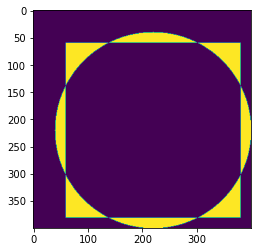

In [63]:
bitwise_xor = cv.bitwise_xor(rectangle, circle)
plt.imshow(bitwise_xor)

Note, that the XOR operation resulted a shape of the not intesection region.

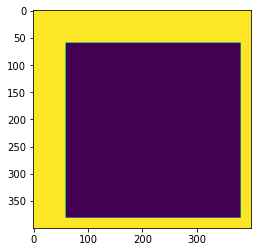

In [64]:
bitwise_not = cv.bitwise_not(rectangle)
plt.imshow(bitwise_not)

### Masking
Masking is an essential operation in some computer vison projects. If you are focusing on people faces, then you can do masking on all people faces and cut all the unwanted parts of the image.

Note: the size of the mask should be the same size as the image.

In [65]:
import cv2 as cv
import numpy as np

image = cv.imread('cat2.jpg')
blank = np.zeros(image.shape[:2], dtype='uint8')
circle_center1 = (int(image.shape[1]//5)+10, int(image.shape[0]//5)+40)
circle_center2 = (int(image.shape[1]//5)+700, int(image.shape[0]//5)+100)

mask = cv.circle(blank, circle_center1, 190, 255, -1 )
mask = cv.circle(mask, circle_center2, 180, 255, -1 )

cv.imshow('mask',mask)
cv.waitKey(0)

-1

In [66]:
bitwise_and = cv.bitwise_and(image,image, mask=mask)
cv.imshow('bitwise_and',bitwise_and)
cv.waitKey(0)

-1

Here in the above image, I designed two mask for cats' faces.

### Computing Histogram:
It allows you basically to visualize the distribution of pixels in the image intensity. You can do this regrdless it is colored image or gray scale image, you can use calcHist() to obtain the histogram.
calcHist Parameters: 

- images: It is an image source of type uint8 or float32.
- channels: It represents the index of the channel. It is given in a square bracket. For the grayscale image, its value is [0].
- mask: It represents a mask image. To find the histogram of the full image, it is given as "None".
- histSize: It represents the number of bins provided as a list. The number of bins that we want to use for computing the histogram
- ranges: It represents the range of intensity values.

The histogram is used to analyse the pixels' intensities whther of grayscales or colored images. When there is no image you get and you try to analyze the image you get and try to equalize the image so that there is no peeking of pixels.

In [76]:
# Histogram
import matplotlib.pyplot as plt
image = cv.imread('cat2.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

histogram = cv.calcHist([gray], [0], None, [256], [0,256])

cv.imshow('Gray', gray)
cv.waitKey(0)

-1

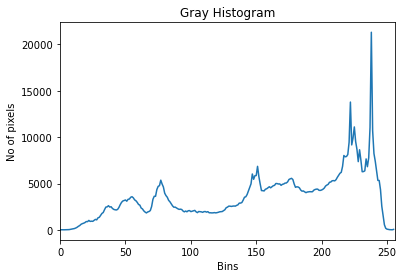

In [68]:
plt.figure()
plt.title('Gray Histogram')
plt.xlabel('Bins')
plt.ylabel('No of pixels')
plt.plot(histogram)
plt.xlim([0,256])
plt.show()

Note, there are many pixels in light colorsfrom 220 to 250

We can add mask, lets see how to add mask to calHist()

In [77]:
# Masking with Histogram
image = cv.imread('cat2.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

blank = np.zeros(image.shape[:2], dtype='uint8')
circle_center1 = (int(image.shape[1]//5)+10, int(image.shape[0]//5)+40)
circle_center2 = (int(image.shape[1]//5)+700, int(image.shape[0]//5)+100)

mask = cv.circle(blank, circle_center1, 190, 255, -1 )
mask = cv.circle(mask, circle_center2, 180, 255, -1 )

cv.imshow('mask',mask)
cv.waitKey(0)

-1

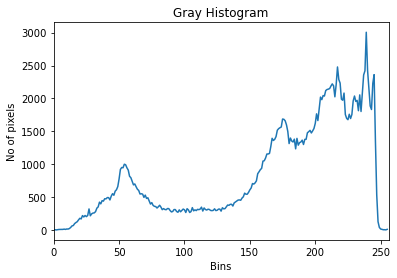

In [70]:
histogram = cv.calcHist([gray], [0], mask, [256], [0,256])

#cv.imshow('Gray', gray)
#cv.waitKey(0)
plt.figure()
plt.title('Gray Histogram')
plt.xlabel('Bins')
plt.ylabel('No of pixels')
plt.plot(histogram)
plt.xlim([0,256])
plt.show()

TO look at more examples look at: https://www.educba.com/opencv-histogram/

https://www.etutorialspoint.com/index.php/309-python-opencv-histograms-of-grayscale-image#:~:text=Python%20OpenCV%20provides%20cv2.calcHist%28%29function%20to%20calculate%20the%20histogram,article%2C%20we%20have%20used%20only%20single%20channel%20image.


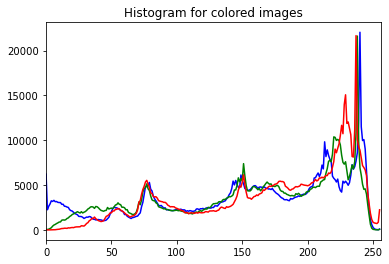

In [71]:
# Histogram with colored without mask
color_channels = ('b','g','r')

for i,color in enumerate(color_channels):
    hist = cv.calcHist([image], [i],None, [256], [0,256])
    plt.plot(hist, color)
    plt.title('Histogram for colored images')
    plt.xlim(0,256)
    
plt.show()    

### Thresholding

It is a binarization of an image. Abinary image is where the pixel is whether black '0' or white '255'. It is based on comparing the pixels in the image with a particular value. There are two types of thresholding, simple thresholding and adaptive thresholding. 


In [72]:
image = cv.imread('cat2.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)


In [73]:
# Simple thresholding
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)

cv.imshow('Threshold', thresh)
cv.imshow('gray', gray)
cv.waitKey(0)

-1

In [74]:
#Inverse thresholding
threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV)

cv.imshow('Threshold Inverse', thresh_inv)
cv.imshow('gray', gray)
cv.waitKey(0)

-1

### Adaptive thresholding 
where there is no a specific threshold value. We can let the computer to definea threshold value for itself. adaptiveThreshold(image, maxiValue, AptiveMethod, thresholdType, blockSize)

This method accepts the following parameters −

src − An object of the class Mat representing the source (input) image.

dst − An object of the class Mat representing the destination (output) image.

maxValue − A variable of double type representing the value that is to be given if pixel value is more than the threshold value.

adaptiveMethod − A variable of integer the type representing the adaptive method to be used. This will be either of the following two values

ADAPTIVE_THRESH_MEAN_C − threshold value is the mean of neighborhood area.

ADAPTIVE_THRESH_GAUSSIAN_C − threshold value is the weighted sum of neighborhood values where weights are a Gaussian window.

thresholdType − A variable of integer type representing the type of threshold to be used.

blockSize − A variable of the integer type representing size of the pixelneighborhood used to calculate the threshold value.

C − A variable of double type representing the constant used in the both methods (subtracted from the mean or weighted mean). The more this value the more you subtract from the mean.

In [78]:
image = cv.imread('cat2.jpg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

adaptive_threshold = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 7)

cv.imshow('Adaptive Threshold', adaptive_threshold)
cv.imshow('Gray', gray)
cv.waitKey(0)

-1

### Refrences:

    https://www.youtube.com/watch?v=oXlwWbU8l2o
    
    https://www.youtube.com/watch?v=j4el1XARYSo&list=PLlH6o4fAIji6epixHdlBYZthV9YVEfT9P&index=10